## import the package

In [3]:
from SKPD import skpdRegressor
from SKPD import *
from tqdm import trange

# 1. Matrxi Case

## 1.1 generate simulated X and Y

In [9]:
## import the true signal as paper descripted
C_true = np.load("circles.npy")
np.random.seed(539)
## image shape
img_shape_m,img_shape_n,img_shape_d = 128,128,1
## sample size 
N = 1000
## noise level
sigma = 3
epsilon = np.random.normal(0,1,N) * sigma
X = []
Y = []
for i in trange(N):
    Xi = np.random.normal(0,1,img_shape_m * img_shape_n * img_shape_d).reshape(img_shape_m,img_shape_n,img_shape_d).squeeze()
    X.append(Xi)
    Y.append(np.vdot(Xi,C_true) + epsilon[i])
    del Xi

100%|██████████| 1000/1000 [00:00<00:00, 1812.68it/s]


## 1.2 training

In [7]:
tic = time.time()
## lambda 1 candidate, corresponds to the lambda in the paper
lmbda_set = [0.4,0.6,1]
## We set lambda2 equals 0 all the time.
lmbda2_set = [0]
## terms: 1 or 3
R_list = [1,2,3]
n_cores = None
p1_list,p2_list,p3_list = [16],[16],[1]
d1_list,d2_list,d3_list = [8],[8],[1]
input_params = {
    "p1_list":p1_list,
    "p2_list":p2_list,
    "d1_list":d1_list,
    "d2_list":d2_list,
    "p3_list":p3_list,
    "d3_list":d3_list,
    "lmbda_set":lmbda_set,
    "lmbda2_set":lmbda2_set,
    ## Z_train is None, when not consider covariate
    "Z_train":None,
    "X_train":X,
    "Y_train":Y,
    ## n_cores is the number of cores for parallel computing, when n_cores = None, we only use a single core in our paper
    ## you can use n_cores > 1 for accelerating your computing
    "R_list":R_list, "n_cores":n_cores,"max_iter":20,"print_iter":30}
a_hat,b_hat,gamma_hat,lmbda1,lmbda2,R,p1,p2,p3,d1,d2,d3 = skpdRegressor(**input_params)
print("cost time: ",time.time()-tic)
print("selected lambda: ",lmbda1)
print("selected R: ",R)

MBIC values:  [6604.3598617027355, 6279.794306023241, 5830.3098891293575, 6200.79904784319, 5713.870617970325, 5829.295518568435, 6329.369554782415, 5474.702894718666, 5799.255073285313]
cost time:  39.34352087974548
selected lambda:  0.6
selected R:  3


In [10]:
A,B,kron_ab = func_kron_ab(a_hat,b_hat,R,p1,p2,d1,d2,p3,d3)
C_hat = kron_ab[-1]
## print measurement: FPR, TPR and RMSE
print(np.array(error(C_hat,C_true))*100)

[ 5.95077437 97.44835966 11.57300489]


[]

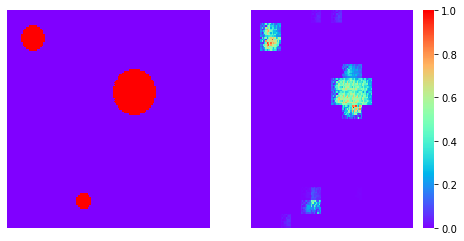

In [12]:
plt.figure(figsize= (8,4))
ax = plt.subplot(1,2,1)
sns.heatmap(fun_normalization(C_true),cmap = "rainbow",cbar = False)
ax.set_xticks([])
ax.set_yticks([])
ax = plt.subplot(1,2,2)
sns.heatmap(fun_normalization(C_hat),cmap = "rainbow",cbar = True)
ax.set_xticks([])
ax.set_yticks([])

# 2. Tensor case

## 3.1 generate underlying true signal, X and Y

In [18]:
## import the true signal as paper descripted
C_true = np.load("2-balls.npy")
np.random.seed(5)
## image shape
img_shape_m,img_shape_n,img_shape_d = 32,32,32
## sample size 
N = 1000
## noise level
sigma = 3
epsilon = np.random.normal(0,1,N) * sigma
X = []
Y = []
for i in trange(N):
    Xi = np.random.normal(0,1,img_shape_m * img_shape_n * img_shape_d).reshape(img_shape_m,img_shape_n,img_shape_d).squeeze()
    X.append(Xi)
    Y.append(np.vdot(Xi,C_true) + epsilon[i])
    del Xi

100%|██████████| 1000/1000 [00:01<00:00, 984.69it/s]


## 3.2 training

In [19]:
tic = time.time()
## lambda 1 candidate, corresponds to the lambda in the paper
lmbda_set = [0.4,0.6,1]
## We set lambda2 equals 0 all the time.
lmbda2_set = [0]
## terms: 1 or 3
R_list = [1]
n_cores = None
p1_list,p2_list,p3_list = [4],[4],[4]
d1_list,d2_list,d3_list = [8],[8],[8]
input_params = {
    "p1_list":p1_list,
    "p2_list":p2_list,
    "d1_list":d1_list,
    "d2_list":d2_list,
    "p3_list":p3_list,
    "d3_list":d3_list,
    "lmbda_set":lmbda_set,
    "lmbda2_set":lmbda2_set,
    ## Z_train is None, when not consider covariate
    "Z_train":None,
    "X_train":X,
    "Y_train":Y,
    ## n_cores is the number of cores for parallel computing, when n_cores = None, we only use a single core in our paper
    ## you can use n_cores > 1 for accelerating your computing
    "R_list":R_list, "n_cores":n_cores,"max_iter":20,"print_iter":30}
a_hat,b_hat,gamma_hat,lmbda1,lmbda2,R,p1,p2,p3,d1,d2,d3 = skpdRegressor(**input_params)
print("cost time: ",time.time()-tic)
print("selected lambda: ",lmbda1)
print("selected R: ",R)

MBIC values:  [1541.5144587209775, 1627.0763142640094, 1860.1379613790891]
cost time:  25.41389799118042
selected lambda:  0.4
selected R:  1


In [20]:
A,B,kron_ab = func_kron_ab(a_hat,b_hat,R,p1,p2,d1,d2,p3,d3)
C_hat = kron_ab[-1]
## print measurement: FPR, TPR and RMSE
print(np.array(error(C_hat,C_true))*100)

[  2.64368521 100.           1.53600746]


In [22]:
## this function is defined in visualizatoin.py
vis_tensor(fun_normalization(C_true))

C:\Users\student\anaconda3\lib\site-packages\k3d\objects.py:1032: UserWarning: wrong dtype: float64 ([<class 'numpy.float16'>, <class 'numpy.float32'>] required)
  warnings.warn('wrong dtype: %s (%s required)' % (actual, required))


Output()